# VGG16

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models,layers
from tensorflow.keras.applications import vgg16,imagenet_utils

In [9]:
train_path = '/kaggle/input/sign-laguage/dataset/train'
val_path = '/kaggle/input/sign-laguage/dataset/valid'
test_path = '/kaggle/input/sign-laguage/dataset/test'

In [10]:
train_data = ImageDataGenerator().flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=10
)
val_data = ImageDataGenerator().flow_from_directory(
    val_path,
    target_size=(224,224),
    batch_size=10
) 
test_data = ImageDataGenerator().flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=10,
    shuffle=False
) 

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [12]:
base_model = vgg16.VGG16(weights = 'imagenet',include_top=False, input_shape=(224,224,3),pooling='avg')

In [13]:
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [16]:
last_layer = base_model.get_layer('global_average_pooling2d_1')
last_output = last_layer.output

x = layers.Dense(10,activation='softmax',name='softmax')(last_output)

new_model = models.Model(inputs=base_model.input,outputs=x)

In [17]:
new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
new_model.fit(train_data,validation_data=val_data,epochs=3)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
172/172 ━━━━━━━━━━━━━━━━━━━━ 575s 3s/step - accuracy: 0.0928 - loss: 6.4340 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/3
172/172 ━━━━━━━━━━━━━━━━━━━━ 566s 3s/step - accuracy: 0.0954 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/3
172/172 ━━━━━━━━━━━━━━━━━━━━ 571s 3s/step - accuracy: 0.1034 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026


In [18]:
def prepare_image(img_path,target_size=(224,224)):
    img = image.load_img(img_path,target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array,axis=0)

    return vgg16.preprocess_input(img_array)

In [23]:
import matplotlib.pyplot as plt
import numpy as np
def predict_image(img_path,model,class_labels):
    img_tensor = prepare_image(img_path)
    pred = model.predict(img_tensor)
    pred_class = np.argmax(pred)
    pred_label = class_labels[pred_class]

    img_display = image.load_img(img_path,target_size=(224,224))
    plt.imshow(img_display)
    plt.axis('off')
    plt.title(f'Predicted: {pred_label}')

    print(f"Image: {img_path}")
    print(f"Predicted Class: {pred_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Image: /kaggle/input/sign-laguage/dataset/test/9/IMG_5317.JPG
Predicted Class: 1


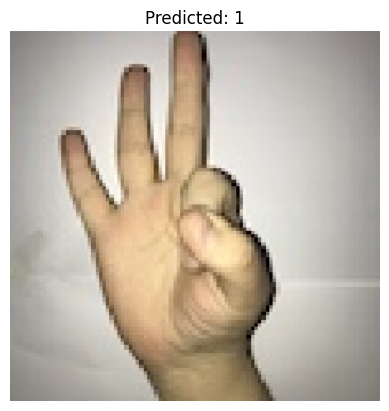

In [24]:
class_labels = list(train_data.class_indices.keys())
img = '/kaggle/input/sign-laguage/dataset/test/9/IMG_5317.JPG'
predict_image(img,new_model,class_labels)

# Resnet50

In [27]:
import numpy as np
from tensorflow.keras.applications import ResNet50

In [28]:
base_model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3),pooling='avg')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [30]:
x = layers.Dense(10,activation='softmax')(base_model.output)
new_model = tf.keras.models.Model(inputs=base_model.input,outputs=x)

In [31]:
new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
new_model.fit(train_data,epochs=2,validation_data=val_data)

Epoch 1/2
172/172 ━━━━━━━━━━━━━━━━━━━━ 708s 4s/step - accuracy: 0.5970 - loss: 1.3423 - val_accuracy: 0.6433 - val_loss: 3.1494
Epoch 2/2
172/172 ━━━━━━━━━━━━━━━━━━━━ 601s 3s/step - accuracy: 0.9443 - loss: 0.1594 - val_accuracy: 0.6467 - val_loss: 1.4760


In [52]:
def prepare_image(img_path,target_size=(224,224)):
    img = image.load_img(img_path,target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array,axis=0)

    return tf.keras.applications.resnet50.preprocess_input(img_array)

In [53]:
def predict_image(img_path,model,class_labels):
    img_tensor=prepare_image(img_path)
    pred = model.predict(img_tensor)
    pred_class = np.argmax(pred)
    pred_label = class_labels[pred_class]

    img_display = image.load_img(img_path,target_size=(224,244))
    plt.imshow(img_display)
    plt.axis('off')
    plt.title(f"Prediction: {pred_label}")
    plt.show()

    print(f"Image: {img_path}")
    print(f"Predicted Class: {pred_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


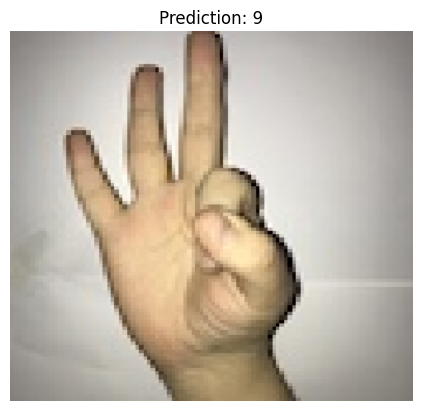

Image: /kaggle/input/sign-laguage/dataset/test/9/IMG_5317.JPG
Predicted Class: 9


In [54]:
predict_image(img,new_model,class_labels)